## Sanity checking dist.ProjectedNormal

In [1]:
import math
import torch
import pyro.distributions as dist
import matplotlib.pyplot as plt

In [2]:
def plot_2d(concentration, num_samples=10000):
    d = dist.ProjectedNormal(torch.tensor(concentration, dtype=torch.float))
    plt.figure(figsize=(6, 3), dpi=300)
    
    theta = torch.linspace(-math.pi, math.pi, 50)
    xy = torch.stack([theta.cos(), theta.sin()], dim=-1)
    prob = d.log_prob(xy).exp()
    plt.plot(theta, prob, "k-", lw=1)
    
    x, y = d.sample((num_samples,)).unbind(-1)
    theta = torch.atan2(y, x)
    plt.hist(theta.numpy(), bins=50, density=True)
    plt.xlim(-math.pi, math.pi)
    plt.ylim(0, None)
    plt.xticks(())
    plt.yticks(())
    plt.tight_layout()

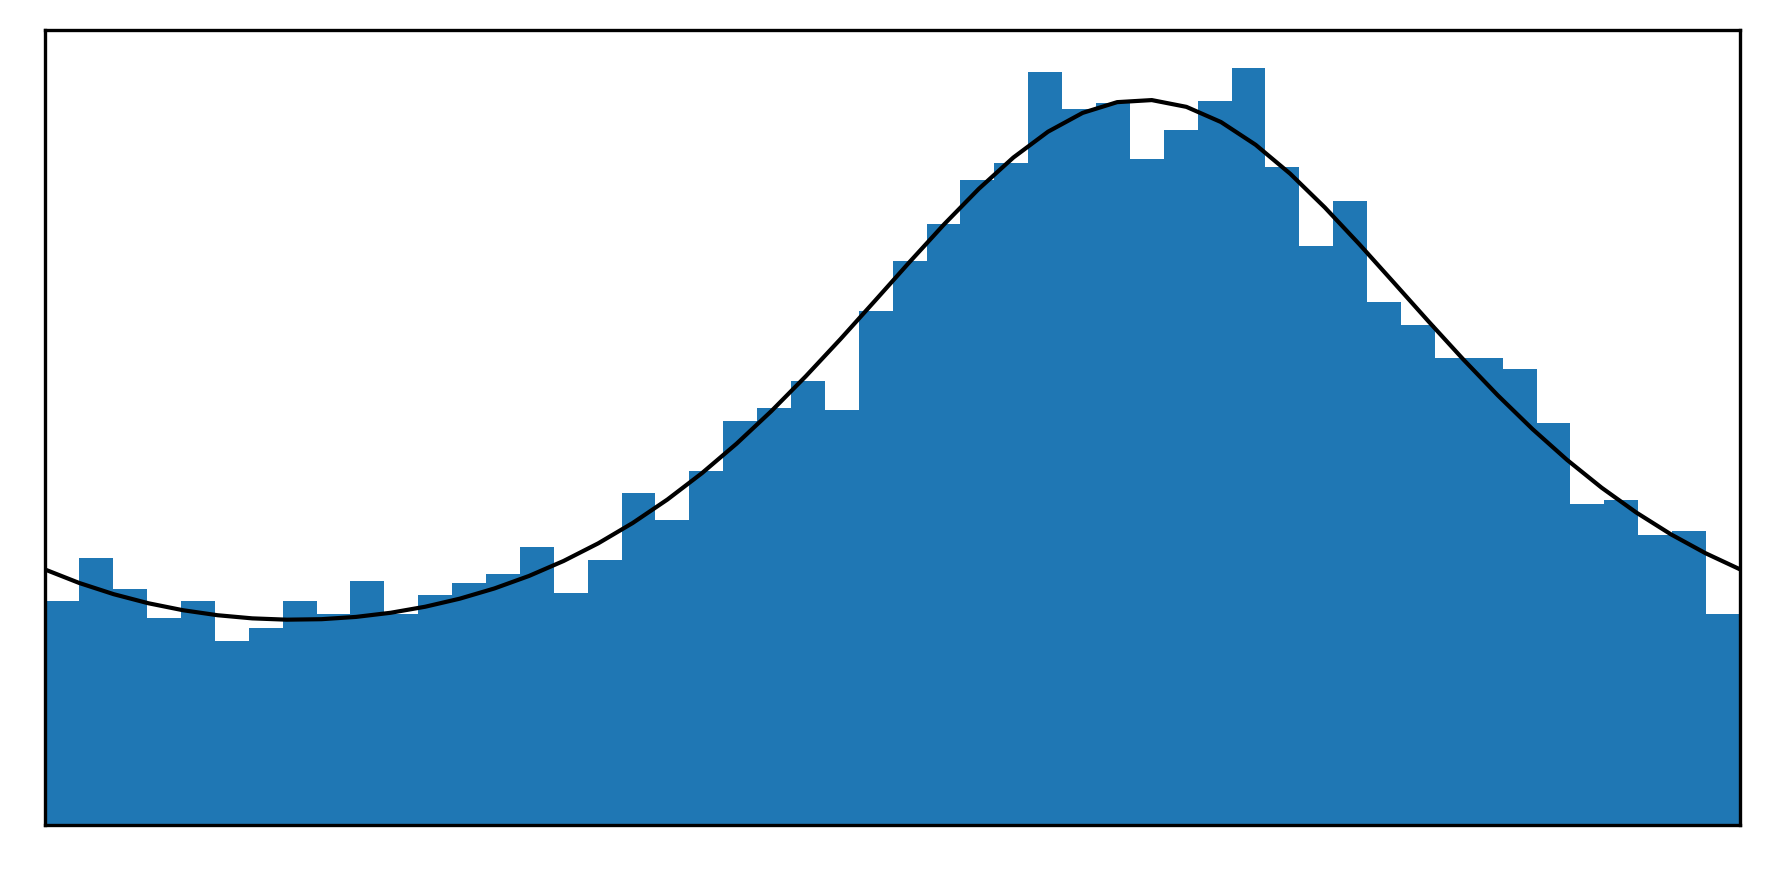

In [3]:
plot_2d([0.3, 0.4])

In [4]:
def plot_3d(concentration, num_samples=1000):
    d = dist.ProjectedNormal(torch.tensor(concentration, dtype=torch.float))
    plt.figure(figsize=(6, 3), dpi=300)
    plt.xlim(-math.pi, math.pi)
    plt.ylim(-1, 1)
    plt.xticks(())
    plt.yticks(())
    
    theta = torch.linspace(-math.pi, math.pi, 50)
    phi = torch.linspace(-math.pi / 2, math.pi / 2, 50)
    theta, phi = torch.broadcast_tensors(theta, phi[:, None])
    xyz = torch.stack([theta.cos() * phi.cos(),
                       theta.sin() * phi.cos(),
                       phi.sin()], dim=-1)
    log_prob = d.log_prob(xyz)
    plt.contour(theta, phi.sin(), log_prob, levels=20, linewidths=1)
    
    xyz = d.sample((num_samples,))
    x, y, z = xyz.unbind(-1)
    r = torch.linalg.norm(xyz[..., :2], dim=-1)
    theta = torch.atan2(y, x)
    phi = torch.atan2(z, r)
    plt.scatter(theta, phi.sin(), 10, lw=0, color="black", alpha=0.5)
    plt.tight_layout()

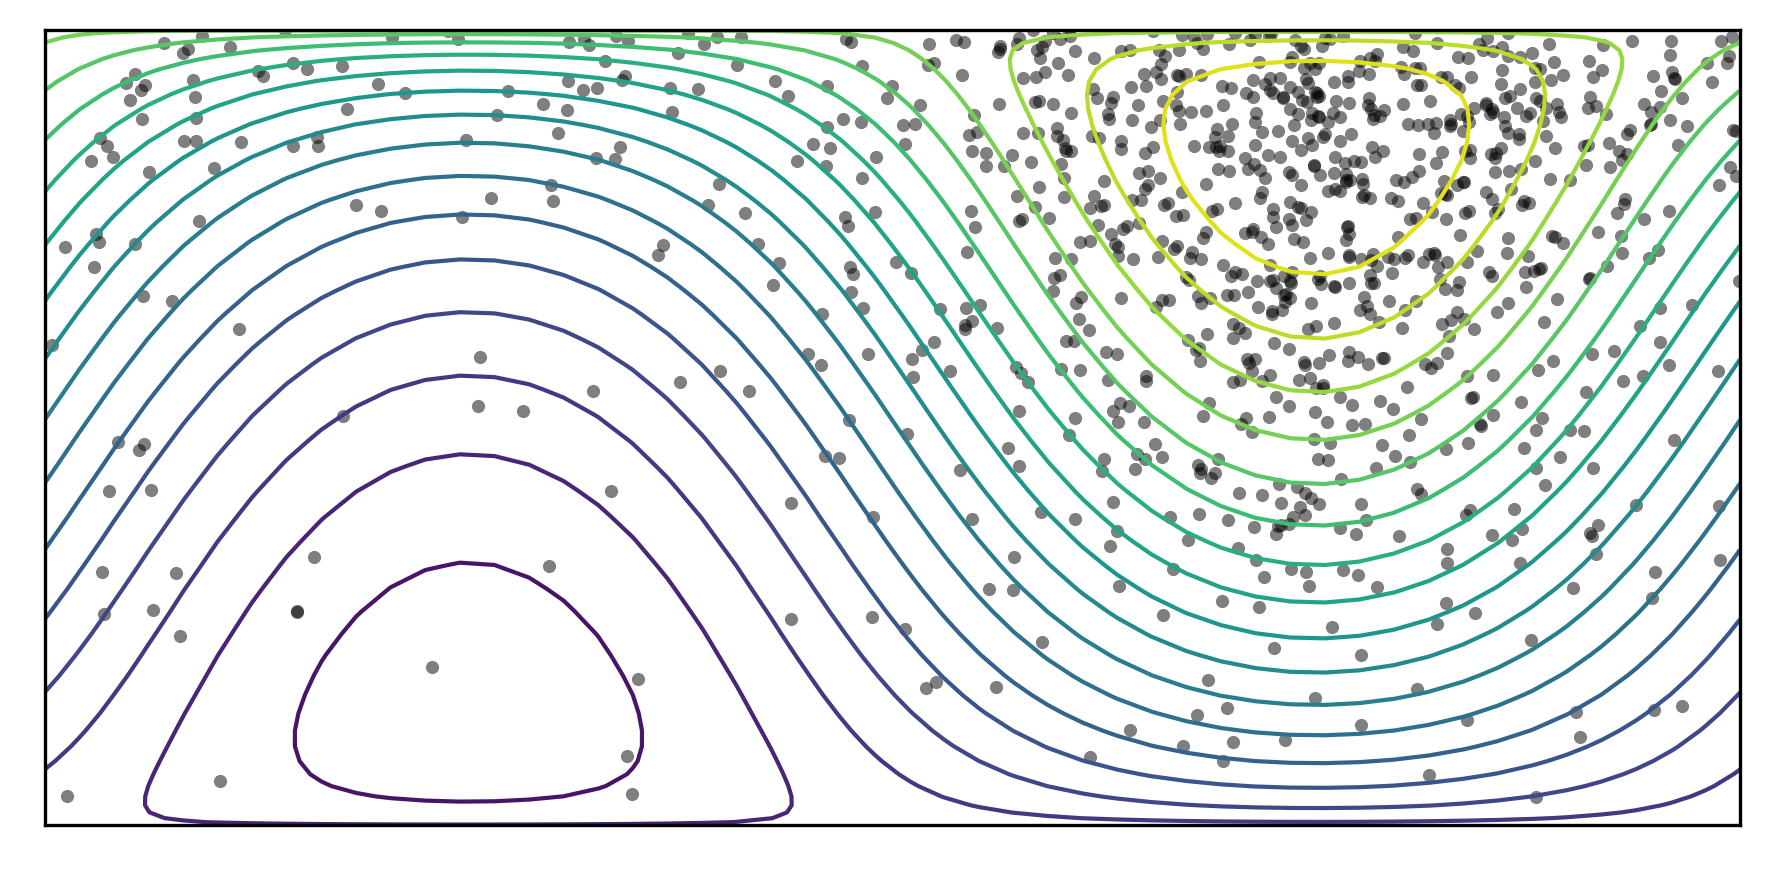

In [5]:
plot_3d([0, 1, 1])